In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# loading data into dataframe

train = pd.read_csv('.\cc\Test 1.csv',sep=',')

In [3]:
# viewing first few rows
train.head(10)

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False
5,721691,AX03efs,E,N,73896.096129,12.906641,0.656848,560,809.333963,22.702967,0.198511,True
6,269858,AX03efs,W,N,73609.404135,3.000000,0.137818,620,697.308163,24.271112,0.179141,False
7,219196,AX03efs,W,N,57619.668582,9.000000,0.367879,658,668.075472,25.886646,0.035338,False
8,413020,AX03efs,W,Y,49282.620299,0.000000,0.182079,519,656.111591,21.838909,0.054130,False
9,174424,AX03efs,W,N,57173.061392,6.000000,0.288242,645,547.767117,24.467187,0.648325,False


In [4]:
# Replcaing 
train.card_offer.replace([True, False], ['true', 'false'], inplace=True)

In [5]:
# Dimension of dataset
train.shape

(10000, 12)

In [6]:
# Statistical summary

train.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,496819.831400,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211
std,287391.314157,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243
min,244.000000,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052
25%,245172.500000,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424
50%,495734.000000,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841
75%,745475.250000,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,1004.497869,30.131214,1.000000


In [7]:
# correlation between the parameters

train.corr()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
customer_id,1.000000,0.004925,0.006856,-0.005716,0.009107,-0.004207,0.005665,0.000762
est_income,0.004925,1.000000,0.010331,0.008689,0.003514,0.004530,-0.000174,-0.004673
hold_bal,0.006856,0.010331,1.000000,0.001825,0.269361,0.013931,0.256165,0.000158
pref_cust_prob,-0.005716,0.008689,0.001825,1.000000,-0.011499,-0.012570,-0.013733,-0.020388
imp_cscore,0.009107,0.003514,0.269361,-0.011499,1.000000,-0.004809,0.926908,0.005362
RiskScore,-0.004207,0.004530,0.013931,-0.012570,-0.004809,1.000000,-0.004359,0.000654
imp_crediteval,0.005665,-0.000174,0.256165,-0.013733,0.926908,-0.004359,1.000000,0.006725
axio_score,0.000762,-0.004673,0.000158,-0.020388,0.005362,0.000654,0.006725,1.000000


In [8]:
# distribution of target values

print(train.groupby('card_offer').size())

card_offer
false    8469
true     1531
dtype: int64


In [9]:
# check for missing values

print(train.isnull().any())

customer_id          False
demographic_slice    False
country_reg          False
ad_exp               False
est_income           False
hold_bal             False
pref_cust_prob       False
imp_cscore           False
RiskScore            False
imp_crediteval       False
axio_score           False
card_offer           False
dtype: bool


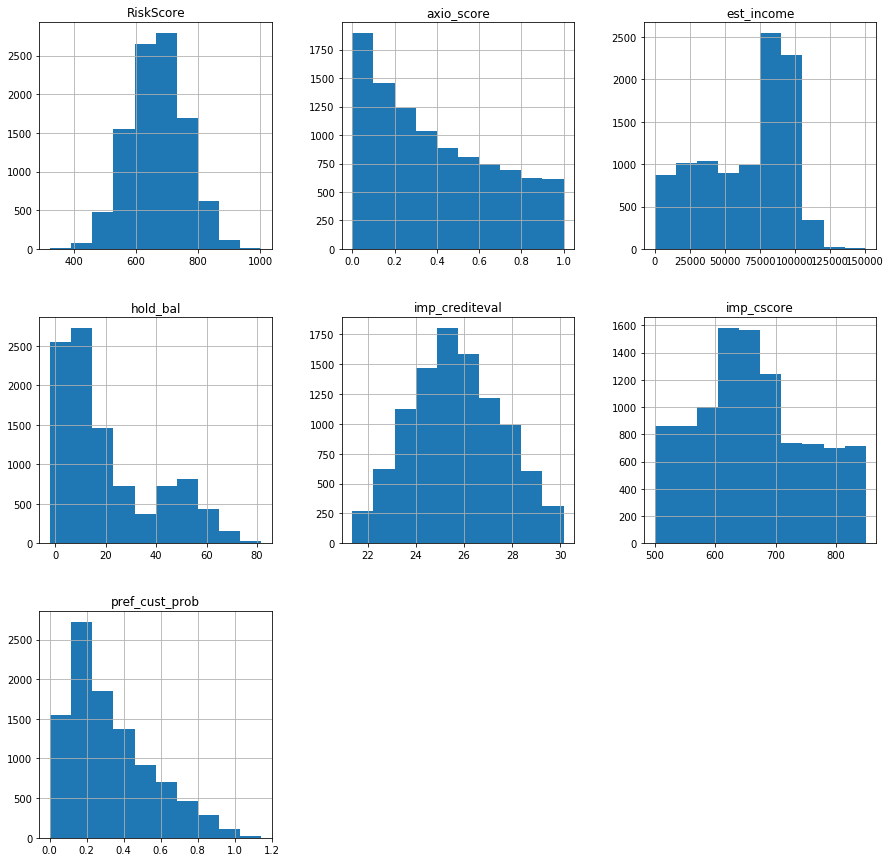

In [10]:
# distribution of various numerical parameters

train[['est_income', 'hold_bal', 'pref_cust_prob', 'imp_cscore', 'RiskScore', 'imp_crediteval', 'axio_score']].hist(figsize=(15, 15))
plt.show()

In [11]:
array = train.values
X = array[:,4:11]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.847375 (0.014475)
LDA: 0.930500 (0.006619)
KNN: 0.820500 (0.014835)
CART: 0.962250 (0.004867)
NB: 0.848125 (0.015044)
SVM: 0.848125 (0.015044)


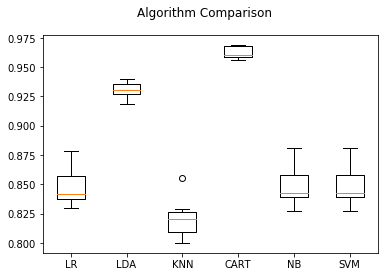

In [13]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Since Decision Tree Classifier seems to be giving most accurate results, I have used it for making predictions on the new data set.

In [14]:
# Classification Metrics

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Accuracy Score: ', accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy Score:  0.9655
[[1659   25]
 [  44  272]]
             precision    recall  f1-score   support

      false       0.97      0.99      0.98      1684
       true       0.92      0.86      0.89       316

avg / total       0.96      0.97      0.97      2000



In [15]:
# Loading the test data set.
test = pd.read_csv('.\cc\Test 2.csv',sep=',')
test.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,NaN
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,NaN
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,NaN
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,NaN
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,NaN


In [16]:
# Assigning the parameters and predicting the customer response
Xtest = test.values[:,4:11]
Ytest = dtc.predict(Xtest)

In [17]:
# Updating the predicted values in the test dataframe
test['card_offer']=Ytest

In [18]:
# Brief overview of the updated test dataframe
test.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,false
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,false
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,false
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,false
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,false


In [19]:
# Replacing the card_offer string values with boolean values as in the original data set
test.card_offer.replace(['true', 'false'], [True, False], inplace=True)

In [20]:
# Writing the dataset to the disk as ds4.csv
test.to_csv('ds4.csv', index=False)